In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose

In [2]:
from scripts.architecture import MLP, MLPManual
from scripts.train import *
from scripts.plot_utils import plot_loss_accuracy, plotValAccuracy, fillSubplot

In [3]:
print(torch.__version__)
print(np.__version__)

1.9.1
1.21.2


## Create Parity Data Iterator

In [4]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

In [5]:
# doesn't perform and transformation until we call the loader
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transforms)
testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transforms)

/home/john/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630839582/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
learn_rate = 0.05
num_epochs = 20
batch_size = 128
loss_type = "Binary Cross Entropy"
loss_fn = torch.nn.BCELoss()
B_initialization = "uniform"
optim = "SGD"
momentum, nesterov_momentum = False, False

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


### For k = 1

Training on cuda:0
Epoch 1 completed. Loss - total: 16352.0669 - average: 0.2725; Performance: 0.8966
TESTING - loss 1819.7104935646057 - performance 0.9326
Epoch 2 completed. Loss - total: 8757.2883 - average: 0.1460; Performance: 0.9505
TESTING - loss 1230.3854619264603 - performance 0.9571
Epoch 3 completed. Loss - total: 6543.8330 - average: 0.1091; Performance: 0.9641
TESTING - loss 981.6972651481628 - performance 0.9674
Epoch 4 completed. Loss - total: 5449.5012 - average: 0.0908; Performance: 0.9701
TESTING - loss 840.1650302410126 - performance 0.9711
Epoch 5 completed. Loss - total: 4756.7150 - average: 0.0793; Performance: 0.9738
TESTING - loss 749.0704782307148 - performance 0.9744
Epoch 6 completed. Loss - total: 4264.5537 - average: 0.0711; Performance: 0.9765
TESTING - loss 684.947621524334 - performance 0.9769
Epoch 7 completed. Loss - total: 3888.7220 - average: 0.0648; Performance: 0.9786
TESTING - loss 637.4964181482792 - performance 0.9788
Epoch 8 completed. Loss - t

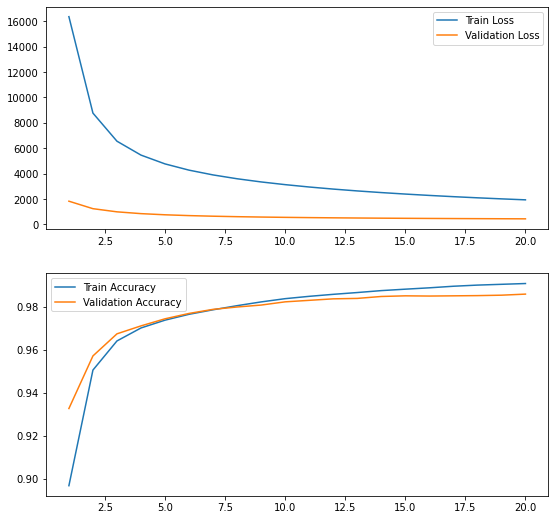

In [7]:
k=1
model = MLP(k, "ReLU", loss_type)
optimizer = torch.optim.Adadelta(model.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList_Ada1, trainAccList_Ada1, valLossList_Ada1, valAccList_Ada1  = train_model(model, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device, lr_scheduler=None, updateWManually=False)

plot_loss_accuracy(trainLostList_Ada1,valLossList_Ada1,trainAccList_Ada1,valAccList_Ada1,num_epochs)

In [8]:
model2 = MLP(k, "ReLU", loss_type)
optimizer = torch.optim.SGD(model2.parameters(), lr=learn_rate, weight_decay=0.001)

trainLostList_sgd1, trainAccList_sgd1, valLossList_sgd1, valAccList_sgd1  = train_model(model2, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device,lr = learn_rate, lr_scheduler=None, updateWManually=False)

Training on cuda:0
Epoch 1 completed. Loss - total: 12115.2076 - average: 0.2019; Performance: 0.9243
TESTING - loss 1227.6913554668427 - performance 0.9558
Epoch 2 completed. Loss - total: 5848.7405 - average: 0.0975; Performance: 0.9676
TESTING - loss 859.7996289730072 - performance 0.9701
Epoch 3 completed. Loss - total: 4468.1699 - average: 0.0745; Performance: 0.9752
TESTING - loss 712.1353692114353 - performance 0.9757
Epoch 4 completed. Loss - total: 3751.6615 - average: 0.0625; Performance: 0.9797
TESTING - loss 630.8430150523782 - performance 0.9785
Epoch 5 completed. Loss - total: 3285.9552 - average: 0.0548; Performance: 0.9824
TESTING - loss 579.7967471033335 - performance 0.9800
Epoch 6 completed. Loss - total: 2941.6943 - average: 0.0490; Performance: 0.9843
TESTING - loss 543.3819805532694 - performance 0.9817
Epoch 7 completed. Loss - total: 2672.4615 - average: 0.0445; Performance: 0.9864
TESTING - loss 515.9501247443259 - performance 0.9826
Epoch 8 completed. Loss - t

In [9]:
modelManual = MLPManual(k, learn_rate, loss_type, "BP", None, optim, device, False)

trainLostList_sgd1_scratch, trainAccList_sgd1_scratch, \
valLossList_sgd1_scratch, valAccList_sgd1_scratch  = train_model_manually(modelManual, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, validate_model = True, device=device)

Training with BP
Training with SGD
Training on cuda:0
Epoch 1 completed. Loss - total: 12033.3926 - average: 0.2006; Performance: 0.9242
TESTING - loss 1198.515288412571 - performance 0.9567
Epoch 2 completed. Loss - total: 5701.9507 - average: 0.0950; Performance: 0.9680
TESTING - loss 833.9568037986755 - performance 0.9709
Epoch 3 completed. Loss - total: 4338.6382 - average: 0.0723; Performance: 0.9757
TESTING - loss 689.7067647576332 - performance 0.9763
Epoch 4 completed. Loss - total: 3615.3240 - average: 0.0603; Performance: 0.9802
TESTING - loss 608.0518695041537 - performance 0.9795
Epoch 5 completed. Loss - total: 3129.8589 - average: 0.0522; Performance: 0.9827
TESTING - loss 555.8528412282467 - performance 0.9811
Epoch 6 completed. Loss - total: 2764.0957 - average: 0.0461; Performance: 0.9851
TESTING - loss 517.816437587142 - performance 0.9821
Epoch 7 completed. Loss - total: 2470.7261 - average: 0.0412; Performance: 0.9869
TESTING - loss 492.5079078376293 - performance 0

In [10]:
modelManualDFA = MLPManual(k, learn_rate, loss_type, "DFA", B_initialization, optim, device, False)
trainLostList_sgd1_dfa, trainAccList_sgd1_dfa, \
valLossList_sgd1_dfa, valAccList_sgd1_dfa  =  train_model_manually(modelManualDFA, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, validate_model = True, device=device)

Training with DFA
Training with SGD
Training on cuda:0
Epoch 1 completed. Loss - total: 14731.3076 - average: 0.2455; Performance: 0.9032
TESTING - loss 1572.1195867061615 - performance 0.9423
Epoch 2 completed. Loss - total: 7823.8716 - average: 0.1304; Performance: 0.9551
TESTING - loss 1136.8609039783478 - performance 0.9601
Epoch 3 completed. Loss - total: 6164.7446 - average: 0.1027; Performance: 0.9650
TESTING - loss 954.3454290628433 - performance 0.9666
Epoch 4 completed. Loss - total: 5302.0215 - average: 0.0884; Performance: 0.9696
TESTING - loss 845.7713194489479 - performance 0.9701
Epoch 5 completed. Loss - total: 4729.4907 - average: 0.0788; Performance: 0.9732
TESTING - loss 772.41285187006 - performance 0.9731
Epoch 6 completed. Loss - total: 4308.5049 - average: 0.0718; Performance: 0.9756
TESTING - loss 718.8707912266254 - performance 0.9754
Epoch 7 completed. Loss - total: 3979.0786 - average: 0.0663; Performance: 0.9777
TESTING - loss 677.4523950517178 - performance

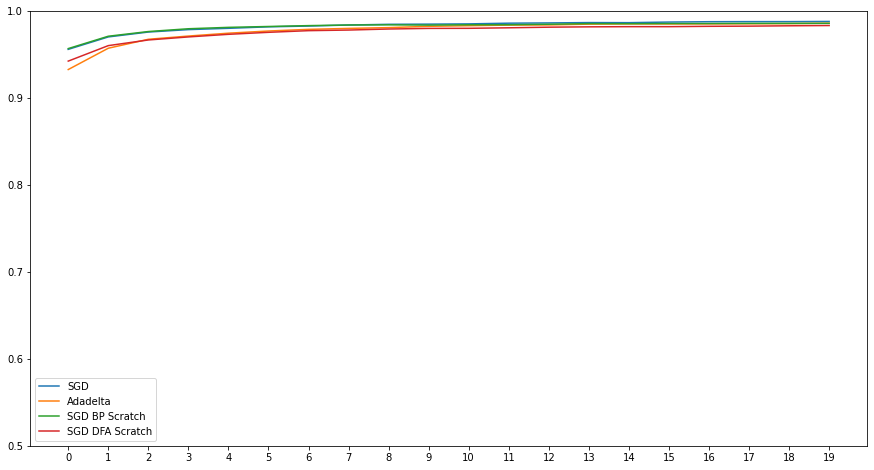

In [11]:
plt.figure(figsize=(15,8))
plt.ylim(0.5,1)
plt.plot(valAccList_sgd1, label="SGD")
plt.plot(valAccList_Ada1, label="Adadelta")
plt.plot(valAccList_sgd1_scratch, label= "SGD BP Scratch")
plt.plot(valAccList_sgd1_dfa, label= "SGD DFA Scratch")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend();


### For k = 3

Training on cuda:0
Epoch 1 completed. Loss - total: 41810.5287 - average: 0.6968; Performance: 0.4991
TESTING - loss 6950.844701766968 - performance 0.5025
Epoch 2 completed. Loss - total: 41538.5632 - average: 0.6923; Performance: 0.5157
TESTING - loss 6908.504123687744 - performance 0.5221
Epoch 3 completed. Loss - total: 41041.8693 - average: 0.6840; Performance: 0.5510
TESTING - loss 6753.839343070984 - performance 0.5864
Epoch 4 completed. Loss - total: 39987.8766 - average: 0.6665; Performance: 0.5970
TESTING - loss 6529.679810523987 - performance 0.6186
Epoch 5 completed. Loss - total: 38403.4673 - average: 0.6401; Performance: 0.6352
TESTING - loss 6241.293265342712 - performance 0.6491
Epoch 6 completed. Loss - total: 36854.1199 - average: 0.6142; Performance: 0.6582
TESTING - loss 5983.654243469238 - performance 0.6717
Epoch 7 completed. Loss - total: 35575.6731 - average: 0.5929; Performance: 0.6768
TESTING - loss 5813.585563659668 - performance 0.6842
Epoch 8 completed. Los

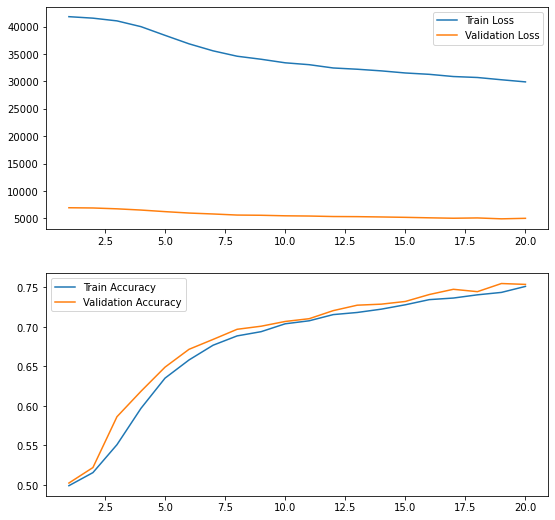

In [12]:
k = 3
model3 = MLP(k,"ReLU", loss_type)
optimizer = torch.optim.Adadelta(model3.parameters(), lr=learn_rate, weight_decay=0.001)

trainLostList_Ada3, trainAccList_Ada3, \
valLossList_Ada3, valAccList_Ada3  = train_model(model3, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device, lr_scheduler=None)

plot_loss_accuracy(trainLostList_Ada3,valLossList_Ada3,trainAccList_Ada3,valAccList_Ada3,num_epochs)

In [13]:
model4 = MLP(k, "ReLU", loss_type)
optimizer = torch.optim.SGD(model4.parameters(), lr=learn_rate, weight_decay=0.001)

trainLostList_sgd3, trainAccList_sgd3, valLossList_sgd3, valAccList_sgd3  = train_model(model4, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device, lr_scheduler=None)

Training on cuda:0
Epoch 1 completed. Loss - total: 41761.0336 - average: 0.6960; Performance: 0.5079
TESTING - loss 6936.342706680298 - performance 0.5118
Epoch 2 completed. Loss - total: 41543.7566 - average: 0.6924; Performance: 0.5123
TESTING - loss 6879.152519226074 - performance 0.5463
Epoch 3 completed. Loss - total: 40320.0137 - average: 0.6720; Performance: 0.5802
TESTING - loss 6456.53727722168 - performance 0.6272
Epoch 4 completed. Loss - total: 37365.4601 - average: 0.6228; Performance: 0.6449
TESTING - loss 6132.8982944488525 - performance 0.6513
Epoch 5 completed. Loss - total: 35313.5653 - average: 0.5886; Performance: 0.6692
TESTING - loss 5810.406223297119 - performance 0.6675
Epoch 6 completed. Loss - total: 34346.2534 - average: 0.5724; Performance: 0.6839
TESTING - loss 5642.451222419739 - performance 0.6921
Epoch 7 completed. Loss - total: 33579.3343 - average: 0.5597; Performance: 0.6954
TESTING - loss 5649.709643363953 - performance 0.6861
Epoch 8 completed. Los

In [14]:
modelManual3 = MLPManual(k, learn_rate, loss_type, "BP", None, optim, device, False)
trainLostList_sgd3_scratch, trainAccList_sgd3_scratch, \
valLossList_sgd3_scratch, valAccList_sgd3_scratch  = train_model_manually(modelManual3, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, validate_model = True, device=device)

Training with BP
Training with SGD
Training on cuda:0
Epoch 1 completed. Loss - total: 41768.6641 - average: 0.6961; Performance: 0.5009
TESTING - loss 6942.8984088897705 - performance 0.5059
Epoch 2 completed. Loss - total: 41534.7422 - average: 0.6922; Performance: 0.5130
TESTING - loss 6882.370916366577 - performance 0.5331
Epoch 3 completed. Loss - total: 40234.0586 - average: 0.6706; Performance: 0.5787
TESTING - loss 6381.262248039246 - performance 0.6295
Epoch 4 completed. Loss - total: 37161.2461 - average: 0.6194; Performance: 0.6452
TESTING - loss 6019.486249923706 - performance 0.6648
Epoch 5 completed. Loss - total: 35168.2305 - average: 0.5861; Performance: 0.6737
TESTING - loss 5664.50168800354 - performance 0.6882
Epoch 6 completed. Loss - total: 34105.5625 - average: 0.5684; Performance: 0.6870
TESTING - loss 5769.038286209106 - performance 0.6826
Epoch 7 completed. Loss - total: 33596.6406 - average: 0.5599; Performance: 0.6931
TESTING - loss 5537.508971214294 - perfor

In [15]:
learn_rate = 0.02 # one of the best lr that I got for uniform B, with 0.05 training didn't perform well
modelManual3DFA = MLPManual(k, learn_rate, loss_type, "DFA", B_initialization, optim, device, False)
trainLostList_sgd3_dfa, trainAccList_sgd3_dfa, \
valLossList_sgd3_dfa, valAccList_sgd3_dfa  = train_model_manually(modelManual3DFA, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, validate_model = True, device=device)

Training with DFA
Training with SGD
Training on cuda:0
Epoch 1 completed. Loss - total: 41774.8203 - average: 0.6962; Performance: 0.4988
TESTING - loss 6936.700145721436 - performance 0.5116
Epoch 2 completed. Loss - total: 41690.5391 - average: 0.6948; Performance: 0.5048
TESTING - loss 6950.11434173584 - performance 0.5012
Epoch 3 completed. Loss - total: 41686.2305 - average: 0.6948; Performance: 0.5038
TESTING - loss 6940.534009933472 - performance 0.5029
Epoch 4 completed. Loss - total: 41654.5273 - average: 0.6942; Performance: 0.5040
TESTING - loss 6948.097547531128 - performance 0.5012
Epoch 5 completed. Loss - total: 41524.7109 - average: 0.6921; Performance: 0.5172
TESTING - loss 6895.310371398926 - performance 0.5385
Epoch 6 completed. Loss - total: 41323.0547 - average: 0.6887; Performance: 0.5321
TESTING - loss 6884.437141418457 - performance 0.5287
Epoch 7 completed. Loss - total: 40920.4062 - average: 0.6820; Performance: 0.5543
TESTING - loss 6799.227343559265 - perfor

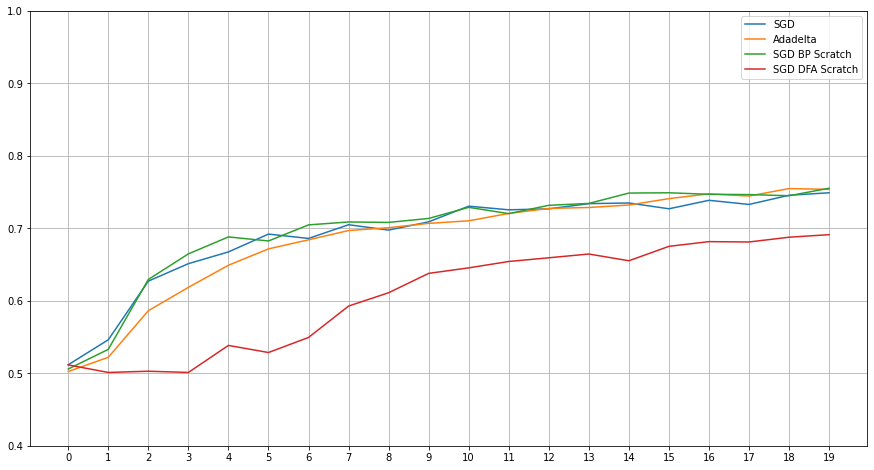

In [16]:
plt.figure(figsize=(15,8))
plt.ylim(0.4,1)
plt.plot(valAccList_sgd3, label="SGD")
plt.plot(valAccList_Ada3, label="Adadelta")
plt.plot(valAccList_sgd3_scratch, label= "SGD BP Scratch")
plt.plot(valAccList_sgd3_dfa, label= "SGD DFA Scratch")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True)
plt.legend();

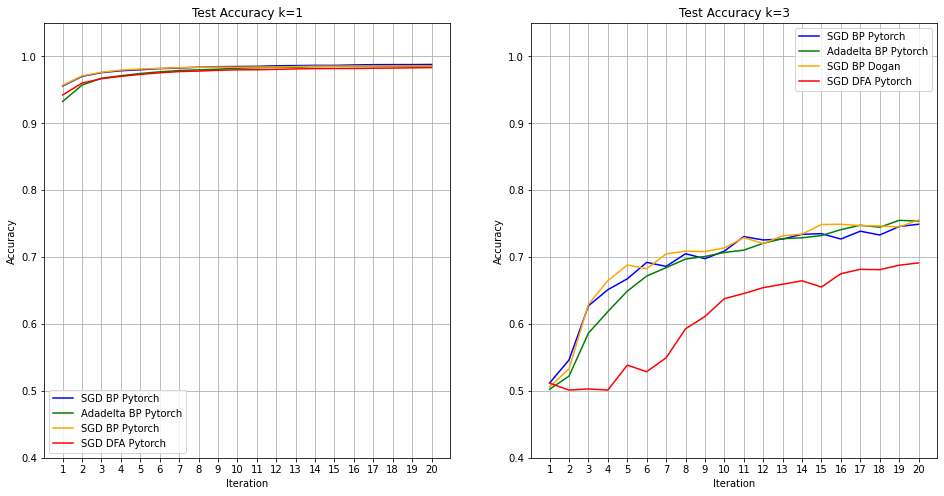

In [17]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16,8))

ax1.plot(range(1,21),valAccList_sgd1, color = "blue", label = "SGD BP Pytorch") 
ax1.plot(range(1,21),valAccList_Ada1, color = "green", label = "Adadelta BP Pytorch")
ax1.plot(range(1,21),valAccList_sgd1_scratch, color = "orange", label = "SGD BP Pytorch") 
ax1.plot(range(1,21),valAccList_sgd1_dfa, color = "red", label = "SGD DFA Pytorch")
ax1.set_ylim(0.40,1.05)
ax1.set_title("Test Accuracy k=1")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(range(1,21))
ax1.legend()
ax1.grid(True)


ax3.plot(range(1,21),valAccList_sgd3, color = "blue", label = "SGD BP Pytorch")
ax3.plot(range(1,21),valAccList_Ada3, color = "green", label = "Adadelta BP Pytorch")
ax3.plot(range(1,21),valAccList_sgd3_scratch, color = "orange", label = "SGD BP Dogan")
ax3.plot(range(1,21),valAccList_sgd3_dfa, color = "red", label = "SGD DFA Pytorch")
ax3.set_ylim(0.40,1.05)
ax3.set_title("Test Accuracy k=3")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Accuracy")
ax3.set_xticks(range(1,21))
ax3.legend()
ax3.grid(True)

### Try with the same weights (SGD BP Pytorch vs SGD BP Dogan)

In [18]:
k = 3
modelx = MLP(k, "ReLU", loss_type).to(device)

w1 = copy.deepcopy(modelx.state_dict()["layer1.weight"]).to(device)
w2 = copy.deepcopy(modelx.state_dict()["layer2.weight"]).to(device)

optimizer = torch.optim.SGD(modelx.parameters(), lr=learn_rate)

trainLostList_sgd3_w, trainAccList_sgd3_w, valLossList_sgd3_w, valAccList_sgd3_w  = train_model(modelx, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device, lr=learn_rate, lr_scheduler=None, updateWManually=True)

Training on cuda:0
Epoch 1 completed. Loss - total: 41754.4332 - average: 0.6959; Performance: 0.5033
TESTING - loss 6952.614898681641 - performance 0.5092
Epoch 2 completed. Loss - total: 41668.4240 - average: 0.6945; Performance: 0.5052
TESTING - loss 6940.723917961121 - performance 0.5059
Epoch 3 completed. Loss - total: 41611.0900 - average: 0.6935; Performance: 0.5090
TESTING - loss 6930.910893440247 - performance 0.5061
Epoch 4 completed. Loss - total: 41527.2498 - average: 0.6921; Performance: 0.5157
TESTING - loss 6892.677152633667 - performance 0.5393
Epoch 5 completed. Loss - total: 41177.0419 - average: 0.6863; Performance: 0.5406
TESTING - loss 6800.609321594238 - performance 0.5572
Epoch 6 completed. Loss - total: 40356.8036 - average: 0.6726; Performance: 0.5785
TESTING - loss 6615.83123588562 - performance 0.6016
Epoch 7 completed. Loss - total: 39010.1274 - average: 0.6502; Performance: 0.6200
TESTING - loss 6374.714056968689 - performance 0.6380
Epoch 8 completed. Loss

In [19]:
modelManualx = MLPManual(k, learn_rate, loss_type, "BP", None, optim, device, (w1.t(),w2.t()))
trainLostList_sgd3_scratch_w, trainAccList_sgd3_scratch_w, \
valLossList_sgd3_scratch_w, valAccList_sgd3_scratch_w  = train_model_manually(modelManualx, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, validate_model = True, device=device)

Training with BP
Training with SGD
Training on cuda:0
Epoch 1 completed. Loss - total: 41794.0742 - average: 0.6966; Performance: 0.4983
TESTING - loss 6949.452892303467 - performance 0.5031
Epoch 2 completed. Loss - total: 41685.5781 - average: 0.6948; Performance: 0.5027
TESTING - loss 6935.888289451599 - performance 0.5059
Epoch 3 completed. Loss - total: 41597.1328 - average: 0.6933; Performance: 0.5083
TESTING - loss 6930.651327133179 - performance 0.5085
Epoch 4 completed. Loss - total: 41525.2695 - average: 0.6921; Performance: 0.5183
TESTING - loss 6901.6133460998535 - performance 0.5348
Epoch 5 completed. Loss - total: 41183.2578 - average: 0.6864; Performance: 0.5427
TESTING - loss 6821.183859825134 - performance 0.5517
Epoch 6 completed. Loss - total: 40455.1328 - average: 0.6743; Performance: 0.5705
TESTING - loss 6637.675024986267 - performance 0.6009
Epoch 7 completed. Loss - total: 39189.1641 - average: 0.6532; Performance: 0.6131
TESTING - loss 6408.553155899048 - perfo

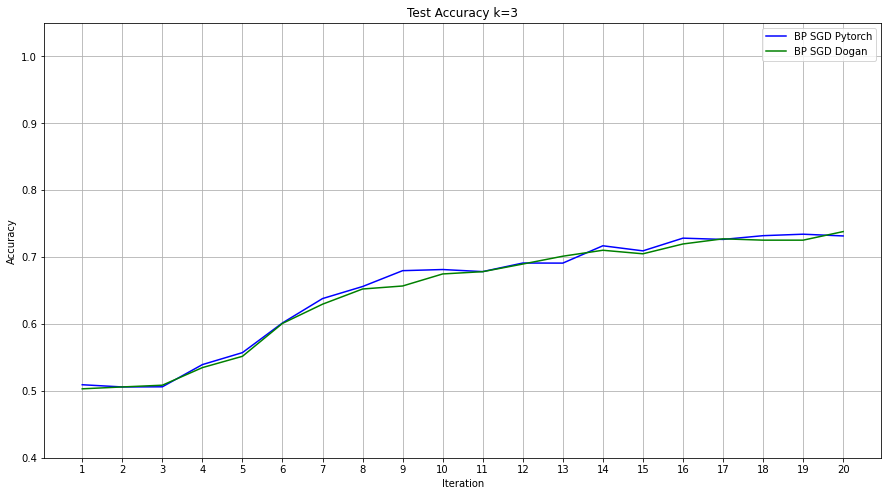

In [20]:
plt.figure(figsize=(15,8))
plt.plot(range(1,21),valAccList_sgd3_w, color = "blue", label = "BP SGD Pytorch")
plt.plot(range(1,21),valAccList_sgd3_scratch_w, color = "green", label = "BP SGD Dogan")

plt.ylim(0.4,1.05)
plt.title("Test Accuracy k=3")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend()
plt.grid(True)

plt.savefig("plots/doganVSPytorch.png")

plt.show();

# They are gonna be different, because I recreate the data every epoch
# Even without recreating, results are different?

### DFA Experiments

Training with DFA
Training with SGD
Training on cuda:0
Epoch 1 completed. Loss - total: 41763.7383 - average: 0.6961; Performance: 0.4988
TESTING - loss 6957.856363296509 - performance 0.4986
Epoch 2 completed. Loss - total: 41714.8516 - average: 0.6952; Performance: 0.4980
TESTING - loss 6946.356844902039 - performance 0.5037
Epoch 3 completed. Loss - total: 41681.2617 - average: 0.6947; Performance: 0.5029
TESTING - loss 6943.989122390747 - performance 0.5051
Epoch 4 completed. Loss - total: 41666.5703 - average: 0.6944; Performance: 0.5036
TESTING - loss 6946.741775512695 - performance 0.4999
Epoch 5 completed. Loss - total: 41660.7539 - average: 0.6943; Performance: 0.4997
TESTING - loss 6942.770574569702 - performance 0.4988
Epoch 6 completed. Loss - total: 41644.6016 - average: 0.6941; Performance: 0.5022
TESTING - loss 6937.788128852844 - performance 0.5005
Epoch 7 completed. Loss - total: 41632.0117 - average: 0.6939; Performance: 0.5060
TESTING - loss 6925.07838344574 - perfor

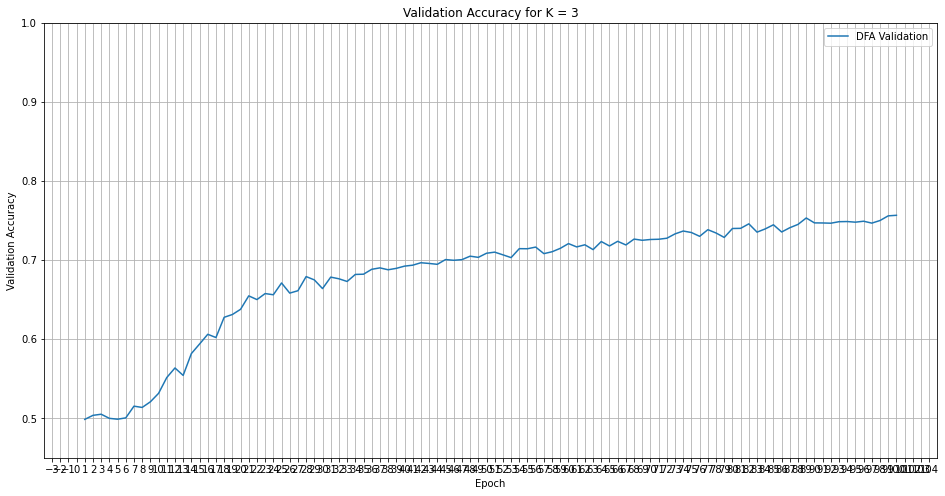

In [21]:
# run DFA up to 100 epochs to see if we get similar result as BP
k=3
learn_rate = 0.01
modelManual4 = MLPManual(k, learn_rate, loss_type, "DFA", B_initialization, optim, device, False)
trainLostList_sgad4_sacratch, trainAccList_sgd4_scratch, \
valLossList_sgd4_scratch, valAccList_sgd4_scratch  = train_model_manually(modelManual4, k, trainset, testset, loss_type, loss_fn, 100, batch_size, momentum,
                                                                         nesterov_momentum, validate_model = True, device=device)
plt.figure(figsize=(16,8))                                                                          
plotValAccuracy(valAccList_sgd4_scratch, 100, "DFA Validation", 3)

Training with DFA
Training with SGD
Training on cuda:0
Epoch 1 completed. Loss - total: 41839.6055 - average: 0.6973; Performance: 0.4974
TESTING - loss 6980.613612174988 - performance 0.4941
Epoch 2 completed. Loss - total: 41767.1484 - average: 0.6961; Performance: 0.5008
TESTING - loss 6960.598867416382 - performance 0.5029
Epoch 3 completed. Loss - total: 41708.5469 - average: 0.6951; Performance: 0.5047
TESTING - loss 6963.928911209106 - performance 0.5070
Epoch 4 completed. Loss - total: 41669.2266 - average: 0.6945; Performance: 0.5047
TESTING - loss 6949.799286842346 - performance 0.5010
Epoch 5 completed. Loss - total: 41647.3047 - average: 0.6941; Performance: 0.5071
TESTING - loss 6940.909593582153 - performance 0.5128
Epoch 6 completed. Loss - total: 41592.9766 - average: 0.6932; Performance: 0.5104
TESTING - loss 6926.208284378052 - performance 0.5137
Epoch 7 completed. Loss - total: 41506.8359 - average: 0.6918; Performance: 0.5170
TESTING - loss 6912.112796783447 - perfo

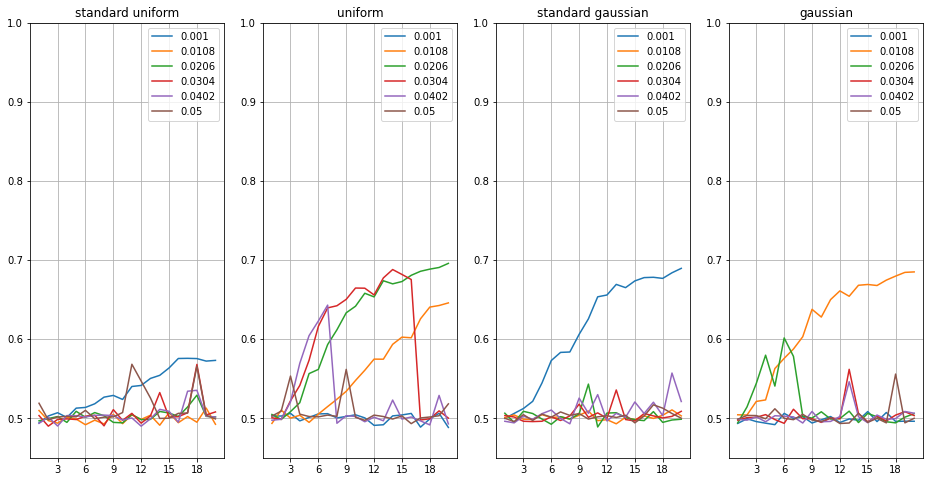

In [24]:
# have plot for same learning rates (same lr array for each random matrix)
num_epochs = 20
K = 3
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,8))
lr_rates = np.linspace(0.001, 0.05, 6)
for init in ["standard uniform", "uniform", "standard gaussian", "gaussian"]:
    for lr in lr_rates:
        if init == "standard uniform":
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                          batch_size, momentum, nesterov_momentum, 
                                                                          validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax1, init)
        elif init == "uniform":
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                          batch_size, momentum, nesterov_momentum, 
                                                                          validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax2, init)
        elif init == "standard gaussian":
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                          batch_size, momentum, nesterov_momentum, 
                                                                          validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax3, init)
        elif init == "gaussian":
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                          batch_size, momentum, nesterov_momentum, 
                                                                          validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax4, init)

plt.savefig("plots/InitsWSamelrs.png")

In [25]:
def tuneLearningRate(lr_array : np.array, training_method: str, init_B: str, optim: str, k:int, loss_type):
    listofValAcc = []
    for learning_rate in lr_array:
        model = MLPManual(k, learning_rate, loss_type, training_method, init_B, optim, device)
        trainLostListLoc, trainAccListLoc, valLossListLoc, valAccListLoc = train_model_manually(model, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                                                batch_size, momentum, nesterov_momentum, 
                                                                                                validate_model = True, device=device)
        last5 = valAccListLoc[-10:]
        meanOfLast5 = sum(last5) / len(last5)
        listofValAcc.append(meanOfLast5)
        listofValAccnp = np.array(listofValAcc)
        idx = np.argsort(listofValAccnp)
        best_lr = lr_array[idx][-1]
    
    print("Best learning rate is: ", best_lr)
    return best_lr


In [26]:
# Tune their learning rates to get best one, it is done by checking the last 10 val Accuracy
k=3
lr_array_uni = np.linspace(0.01, 0.025, 6)
lr_array_std_uni = np.linspace(0.0015, 0.0035, 6)
lr_array_gauss = np.linspace(0.01, 0.02, 6)
lr_array_std_gauss = np.linspace(0.0005, 0.001, 6)
lr_array_bp = np.linspace(0.05, 0.3, 6)

# best_lr_uni = tuneLearningRate(lr_array_uni, "DFA", "uniform", optim, k, loss_type)
# best_lr_std_uni = tuneLearningRate(lr_array_std_uni, "DFA", "standard uniform", optim, k, loss_type)
# best_lr_gaussian = tuneLearningRate(lr_array_gauss, "DFA", "gaussian", optim, k, loss_type)
# best_lr_std_gaussian = tuneLearningRate(lr_array_std_gauss, "DFA", "standard gaussian", optim, k, loss_type)
# best_lr_bp = tuneLearningRate(lr_array_bp, "BP", None, optim, k, loss_type)

Training with DFA
Training with SGD
Training on cuda:0
Epoch 1 completed. Loss - total: 41766.1250 - average: 0.6961; Performance: 0.5033
TESTING - loss 6961.487020492554 - performance 0.5049
Epoch 2 completed. Loss - total: 41722.6680 - average: 0.6954; Performance: 0.4994
TESTING - loss 6949.769903182983 - performance 0.5004
Epoch 3 completed. Loss - total: 41662.8672 - average: 0.6944; Performance: 0.5033
TESTING - loss 6943.158887863159 - performance 0.5032
Epoch 4 completed. Loss - total: 41679.7969 - average: 0.6947; Performance: 0.4998
TESTING - loss 6939.038209915161 - performance 0.5013
Epoch 5 completed. Loss - total: 41619.5742 - average: 0.6937; Performance: 0.5085
TESTING - loss 6931.425100326538 - performance 0.5109
Epoch 6 completed. Loss - total: 41624.3281 - average: 0.6937; Performance: 0.5057
TESTING - loss 6928.375149726868 - performance 0.5105
Epoch 7 completed. Loss - total: 41570.3867 - average: 0.6928; Performance: 0.5118
TESTING - loss 6918.271343231201 - perfo

In [35]:
# tuning these parameters take too much time, so let's run once and store them statically
best_lr_uni = 0.022
best_lr_std_uni = 0.0031
best_lr_gaussian = 0.012
best_lr_std_gaussian = 0.001
best_lr_bp = 0.15

Training with DFA
Training with SGD
Training on cuda:0
Epoch 1 completed. Loss - total: 41840.7070 - average: 0.6973; Performance: 0.4997
TESTING - loss 6954.934103012085 - performance 0.5055
Epoch 2 completed. Loss - total: 41793.7031 - average: 0.6966; Performance: 0.5040
TESTING - loss 6934.873350143433 - performance 0.5110
Epoch 3 completed. Loss - total: 41794.9219 - average: 0.6966; Performance: 0.5135
TESTING - loss 6987.845863342285 - performance 0.5074
Epoch 4 completed. Loss - total: 41443.2383 - average: 0.6907; Performance: 0.5314
TESTING - loss 6852.12491607666 - performance 0.5307
Epoch 5 completed. Loss - total: 40666.6992 - average: 0.6778; Performance: 0.5653
TESTING - loss 6756.006517410278 - performance 0.5697
Epoch 6 completed. Loss - total: 40277.0742 - average: 0.6713; Performance: 0.5774
TESTING - loss 6664.6618728637695 - performance 0.5807
Epoch 7 completed. Loss - total: 39889.1406 - average: 0.6648; Performance: 0.5769
TESTING - loss 6622.768306732178 - perfo

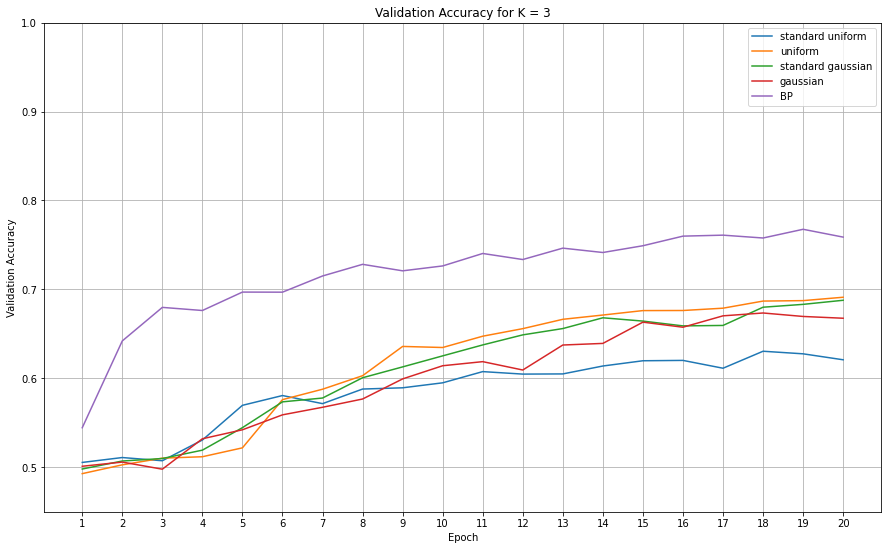

In [36]:
# have a plot with different B initialization methods with 20 epochs with their best lr
initializations = ["standard uniform", "uniform", "standard gaussian", "gaussian", "BP"]
num_epochs=20
K=3
optim = "SGD"

fig = plt.figure(figsize=(15,9))
for ini in initializations:
    if ini == "uniform":
        modelManualx = MLPManual(K, best_lr_uni, loss_type, "DFA", ini, optim, device, False)
    elif ini == "standard uniform":
        modelManualx = MLPManual(K, best_lr_std_uni, loss_type, "DFA", ini, optim, device, False)
    elif ini == "gaussian":
        modelManualx = MLPManual(K, best_lr_gaussian, loss_type, "DFA", ini, optim, device, False)
    elif ini == "standard gaussian":
        modelManualx = MLPManual(K, best_lr_std_gaussian, loss_type, "DFA", ini, optim, device, False)
    else:
        modelManualx = MLPManual(K, best_lr_bp, loss_type, "BP", None, optim, device, False)
    trainLostList, trainAccList, \
    valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
    plotValAccuracy(valAccList, num_epochs, ini, K)

plt.savefig("plots/randomBInit.png")

Training with DFA
Training with SGD
Training on cuda:0
Epoch 1 completed. Loss - total: 41709.9688 - average: 0.6952; Performance: 0.5002
TESTING - loss 6935.638671875 - performance 0.5013
Epoch 2 completed. Loss - total: 41617.7344 - average: 0.6936; Performance: 0.4997
TESTING - loss 6933.534091949463 - performance 0.4994
Epoch 3 completed. Loss - total: 41603.8945 - average: 0.6934; Performance: 0.5026
TESTING - loss 6935.371508598328 - performance 0.5068
Epoch 4 completed. Loss - total: 41717.6953 - average: 0.6953; Performance: 0.5094
TESTING - loss 6927.148241996765 - performance 0.5123
Epoch 5 completed. Loss - total: 41560.0430 - average: 0.6927; Performance: 0.5161
TESTING - loss 6907.861297607422 - performance 0.5274
Epoch 6 completed. Loss - total: 41438.2734 - average: 0.6906; Performance: 0.5247
TESTING - loss 6888.533098220825 - performance 0.5345
Epoch 7 completed. Loss - total: 41226.7461 - average: 0.6871; Performance: 0.5453
TESTING - loss 6852.160747528076 - performa

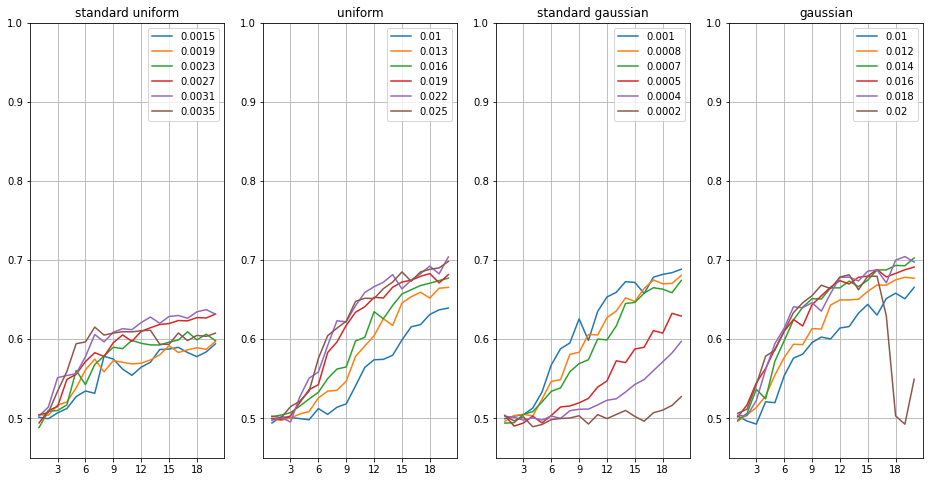

In [29]:
# have plot for different learning rates (different lr_array for each random matrix)
num_epochs = 20
K = 3
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,8))
lr_array_uni = np.linspace(0.01, 0.025, 6)
lr_array_std_uni = np.linspace(0.0015, 0.0035, 6)
lr_array_gauss = np.linspace(0.01, 0.02, 6)
lr_array_std_gauss = np.linspace(0.001, 0.0002, 6)
lr_array_bp = np.linspace(0.05, 0.3, 6)

for init in ["standard uniform", "uniform", "standard gaussian", "gaussian"]:
    if init == "standard uniform":
        for lr in lr_array_std_uni:
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax1, init)
    elif init == "uniform":
        for lr in lr_array_uni:
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax2, init)
    elif init == "standard gaussian":
        for lr in lr_array_std_gauss:
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax3, init)
    elif init == "gaussian":
        for lr in lr_array_gauss:
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax4, init)

plt.savefig("plots/InitsWDifferentlrs.png")

### Optimizers Experiments

Training with DFA
Training with SGD
Training on cuda:0
Epoch 1 completed. Loss - total: 41772.6758 - average: 0.6962; Performance: 0.5030
TESTING - loss 6964.755620956421 - performance 0.4986
Epoch 2 completed. Loss - total: 41694.4492 - average: 0.6949; Performance: 0.5028
TESTING - loss 6949.540047645569 - performance 0.4979
Epoch 3 completed. Loss - total: 41734.5625 - average: 0.6956; Performance: 0.4965
TESTING - loss 6936.961225509644 - performance 0.5090
Epoch 4 completed. Loss - total: 41698.5156 - average: 0.6950; Performance: 0.4988
TESTING - loss 6945.002378463745 - performance 0.5016
Epoch 5 completed. Loss - total: 41677.9375 - average: 0.6946; Performance: 0.4985
TESTING - loss 6936.349645614624 - performance 0.5109
Epoch 6 completed. Loss - total: 41673.2305 - average: 0.6946; Performance: 0.5002
TESTING - loss 6942.258004188538 - performance 0.4991
Epoch 7 completed. Loss - total: 41654.9492 - average: 0.6942; Performance: 0.5003
TESTING - loss 6937.964450836182 - perfo

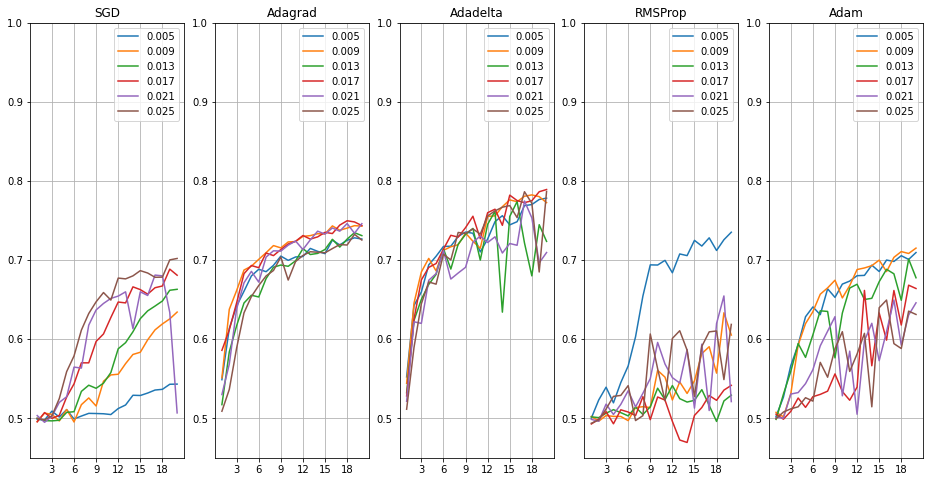

In [37]:
# have plot for same learning rates (same lr array for each random matrix)
init = "uniform"
num_epochs = 20
K = 3
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(16,8))
lr_rates = np.linspace(0.005, 0.025, 6)
for optim in ["SGD", "Adagrad", "Adadelta", "RMSProp", "Adam"]:
    for lr in lr_rates:
        if optim == "SGD":
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax1, optim)
        elif optim == "Adagrad":
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax2, optim)
        elif optim == "Adadelta":
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax3, optim)
        elif optim == "RMSProp":
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax4, optim)
        else: # ADAM
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax5, optim)


plt.savefig("plots/OptimsWSamelrs.png")

In [38]:
# Tune their learning rates to get best one, it is done by checking the last 10 val Accuracy
k=3
lr_array_adagrad = np.linspace(0.001, 0.005, 6)
lr_array_rmsprop = np.linspace(0.0001, 0.0003, 6)
lr_array_adam = np.linspace(0.0001, 0.001, 6)

best_lr_adagrad = tuneLearningRate(lr_array_adagrad, "DFA", init, "Adagrad", k, loss_type)  
best_lr_rmsprop = tuneLearningRate(lr_array_rmsprop, "DFA", init, "RMSProp", k, loss_type)
best_lr_adam = tuneLearningRate(lr_array_adam, "DFA", init, "Adam", k, loss_type)

Training with DFA
Training with Adagrad
Training on cuda:0
Epoch 1 completed. Loss - total: 41883.8711 - average: 0.6981; Performance: 0.4981
TESTING - loss 6970.783994674683 - performance 0.4938
Epoch 2 completed. Loss - total: 41692.8398 - average: 0.6949; Performance: 0.5052
TESTING - loss 6939.987308502197 - performance 0.5035
Epoch 3 completed. Loss - total: 41547.7891 - average: 0.6925; Performance: 0.5186
TESTING - loss 6897.957312583923 - performance 0.5338
Epoch 4 completed. Loss - total: 41276.2266 - average: 0.6879; Performance: 0.5393
TESTING - loss 6857.4078550338745 - performance 0.5534
Epoch 5 completed. Loss - total: 40884.1328 - average: 0.6814; Performance: 0.5671
TESTING - loss 6775.6041259765625 - performance 0.5848
Epoch 6 completed. Loss - total: 40469.0156 - average: 0.6745; Performance: 0.5892
TESTING - loss 6691.488739967346 - performance 0.6099
Epoch 7 completed. Loss - total: 40046.7266 - average: 0.6674; Performance: 0.6068
TESTING - loss 6617.782356262207 -

In [41]:
best_lr_SGD = 0.022
best_lr_adagrad = 0.017
best_lr_adadelta = 0.017
best_lr_rmsprop = 0.005
best_lr_adam = 0.009

Training with DFA
Training with SGD
Training on cuda:0
Epoch 1 completed. Loss - total: 41768.8828 - average: 0.6961; Performance: 0.4976
TESTING - loss 6958.578969955444 - performance 0.4967
Epoch 2 completed. Loss - total: 41711.9180 - average: 0.6952; Performance: 0.4984
TESTING - loss 6953.992464065552 - performance 0.4998
Epoch 3 completed. Loss - total: 41697.3477 - average: 0.6950; Performance: 0.5014
TESTING - loss 6958.177548408508 - performance 0.5012
Epoch 4 completed. Loss - total: 41623.7656 - average: 0.6937; Performance: 0.5095
TESTING - loss 6920.438963890076 - performance 0.5247
Epoch 5 completed. Loss - total: 41475.5039 - average: 0.6913; Performance: 0.5248
TESTING - loss 6866.288669586182 - performance 0.5535
Epoch 6 completed. Loss - total: 41122.9648 - average: 0.6854; Performance: 0.5504
TESTING - loss 6804.500137329102 - performance 0.5643
Epoch 7 completed. Loss - total: 40612.5586 - average: 0.6769; Performance: 0.5733
TESTING - loss 6780.981158256531 - perfo

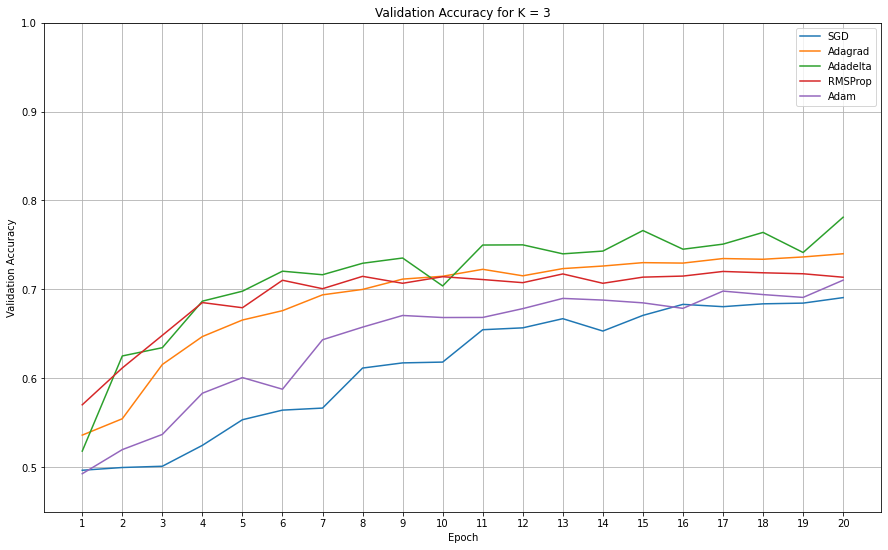

In [42]:
# have a plot with different B initialization methods with 20 epochs with their best lr
optims = ["SGD", "Adagrad", "Adadelta", "RMSProp", "Adam"]
num_epochs=20
K=3
init = "uniform"

fig = plt.figure(figsize=(15,9))
for optim in optims:
    if optim == "SGD":
        modelManualx = MLPManual(K, best_lr_SGD, loss_type, "DFA", init, optim, device, False)
    elif optim == "Adagrad":
        modelManualx = MLPManual(K, best_lr_adagrad, loss_type, "DFA", init, optim, device, False)
    elif optim == "Adadelta":
        modelManualx = MLPManual(K, best_lr_adadelta, loss_type, "DFA", init, optim, device, False)
    elif optim == "RMSPRop":
        modelManualx = MLPManual(K, best_lr_rmsprop, loss_type, "DFA", init, optim, device, False)
    elif optim == "Adam":
        modelManualx = MLPManual(K, best_lr_adam, loss_type, "DFA", init, optim, device, False)
    else:
        modelManualx = MLPManual(K, best_lr_adam, loss_type, "BP", None, optim, device, False)

    trainLostList, trainAccList, \
    valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
    plotValAccuracy(valAccList, num_epochs, optim, K)

plt.savefig("plots/randomBOptims.png")

Training with DFA
Training with SGD
Training on cuda:0
Epoch 1 completed. Loss - total: 41747.4492 - average: 0.6958; Performance: 0.5011
TESTING - loss 6943.90741443634 - performance 0.5050
Epoch 2 completed. Loss - total: 41681.7617 - average: 0.6947; Performance: 0.5035
TESTING - loss 6943.147184371948 - performance 0.5003
Epoch 3 completed. Loss - total: 41676.9336 - average: 0.6946; Performance: 0.5039
TESTING - loss 6939.939378738403 - performance 0.5016
Epoch 4 completed. Loss - total: 41659.7227 - average: 0.6943; Performance: 0.5010
TESTING - loss 6937.984923362732 - performance 0.5100
Epoch 5 completed. Loss - total: 41604.4688 - average: 0.6934; Performance: 0.5100
TESTING - loss 6924.494331359863 - performance 0.5201
Epoch 6 completed. Loss - total: 41536.3398 - average: 0.6923; Performance: 0.5148
TESTING - loss 6895.8678369522095 - performance 0.5351
Epoch 7 completed. Loss - total: 41366.2617 - average: 0.6894; Performance: 0.5299
TESTING - loss 6870.632254600525 - perfo

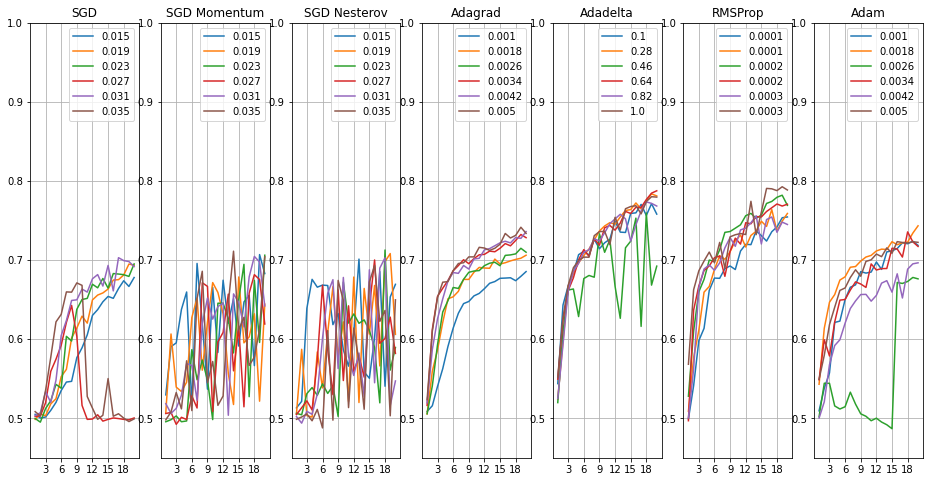

In [7]:
# have plot for different learning rates (different lr_array for each random matrix)
num_epochs = 20
init = "uniform"
K = 3
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, figsize=(16,8))
lr_array_sgd = np.linspace(0.015, 0.035, 6)
lr_array_adagrad = np.linspace(0.001, 0.005, 6)
lr_array_adadelta = np.linspace(0.1, 1, 6)
lr_array_rmsprop = np.linspace(0.0001, 0.0003, 6)
lr_array_adam = np.linspace(0.001, 0.005, 6)

for optim in ["SGD", "SGD Momentum", "SGD Nesterov", "Adagrad", "Adadelta", "RMSProp", "Adam"]:
    if optim == "SGD":
        for lr in lr_array_sgd:
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax1, optim)

    elif "Momentum" in optim:
        for lr in lr_array_sgd:
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, "SGD", device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, 0.9, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax2, optim)
    
    elif "Nesterov" in optim:
        for lr in lr_array_sgd:
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, "SGD", device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, 0.9, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax3, optim)

    elif optim == "Adagrad":
        for lr in lr_array_adagrad:
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax4, optim)
    elif optim == "Adadelta":
        for lr in lr_array_adadelta:
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax5, optim)
    elif optim == "RMSProp":
        for lr in lr_array_rmsprop:
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax6, optim)
    else:
        for lr in lr_array_adam:
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, False)
            trainLostList, trainAccList, \
            valLossList, valAccList  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, 
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax7, optim)


plt.savefig("plots/OptimsWDifferentlrs.png")

### Main Experiment

In [ ]:
# have plot for SGD Pytorch, Adadelta Pytorch, SGD BP Dogan, Adadelta BP Dogan, SGD DFA Dogan, Adadelta DFA Dogan
# before this plot tune the models which are not tuned 

Activation: Adadelta
Training on cuda:0
Epoch 1 completed. Loss - total: 41609.9649 - average: 0.6935; Performance: 0.5173
TESTING - loss 6828.731001853943 - performance 0.5303
Epoch 2 completed. Loss - total: 39237.4312 - average: 0.6540; Performance: 0.6025
TESTING - loss 6248.191485404968 - performance 0.6440
Epoch 3 completed. Loss - total: 36069.8303 - average: 0.6012; Performance: 0.6642
TESTING - loss 5807.556791305542 - performance 0.6814
Epoch 4 completed. Loss - total: 34463.5534 - average: 0.5744; Performance: 0.6853
TESTING - loss 5544.250390052795 - performance 0.7045
Epoch 5 completed. Loss - total: 33444.4829 - average: 0.5574; Performance: 0.6992
TESTING - loss 5446.79017162323 - performance 0.7127
Epoch 6 completed. Loss - total: 32637.1522 - average: 0.5440; Performance: 0.7091
TESTING - loss 5374.669857978821 - performance 0.7196
Epoch 7 completed. Loss - total: 32112.6791 - average: 0.5352; Performance: 0.7166
TESTING - loss 5279.243992328644 - performance 0.7235
Ep

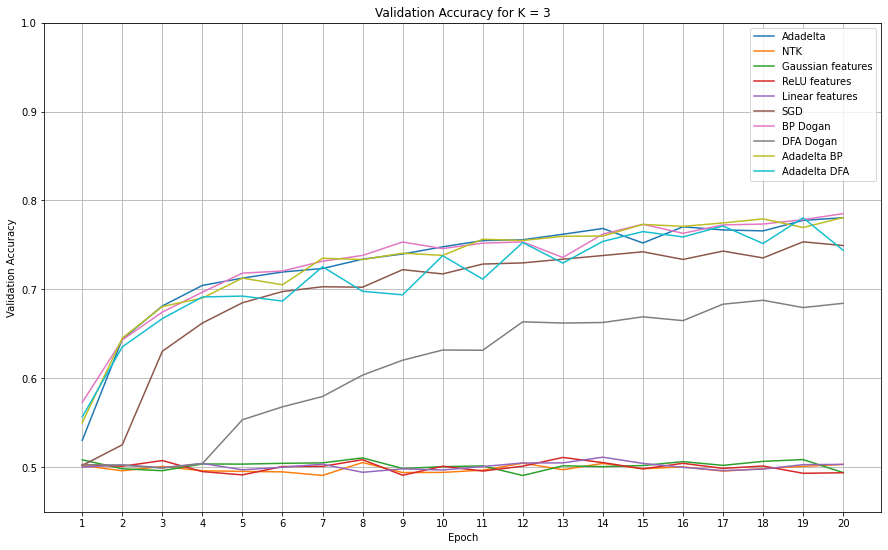

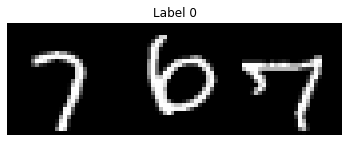

In [17]:
# Add Lazy methods
learn_rate = 0.05
K = 3
num_epochs = 20
loss_type = "Binary Cross Entropy"

fig = plt.figure(figsize=(15,9))
for activation in ["Adadelta", "NTK", "Gaussian features", "ReLU features", "Linear features", "SGD", "BP Dogan", "DFA Dogan", "Adadelta BP", "Adadelta DFA"]:
    if activation != "SGD Dogan" and "DFA" not in activation:
        model = MLP(K, activation, loss_type)
        if "features" in activation:
            # deactivate the first layer
            optimizer = torch.optim.Adadelta(model.layer2.parameters(), lr = learn_rate, weight_decay=0.001)
        elif "NTK" in activation:
            paramsToUpdate = list(model.layer1.parameters()) + list(model.layer2.parameters())
            optimizer = torch.optim.Adadelta(paramsToUpdate, lr = learn_rate, weight_decay=0.001)
        elif "SGD" in activation:
            optimizer = torch.optim.SGD(model.parameters(), lr = learn_rate, weight_decay=0.001)
        else:
            optimizer = torch.optim.Adadelta(model.parameters(), lr = 0.15, weight_decay=0.001)

        print("Activation:",activation)

        trainLostList, trainAccList, valLossList, valAccList  = train_model(model, K, trainset, testset, loss_type, loss_fn, optimizer, num_epochs,
                                                                            batch_size, validate_model = True, performance=accuracy,
                                                                            device="cuda:0", lr_scheduler=None)
    else:
        #print("Activation:",activation)
        if activation == "BP Dogan":
            learn_rate = 0.15
            modelManual3 = MLPManual(K, learn_rate, loss_type, "BP", None, "SGD", device, False)

        if activation == "DFA Dogan":
            learn_rate = 0.02
            modelManual3 = MLPManual(K, learn_rate, loss_type, "DFA", "uniform", "SGD", device, False)

        elif activation == "Adadelta BP":
            modelManual3 = MLPManual(K, 1, loss_type, "BP", None, "Adadelta", device, False)

        else: # Adadelta DFA
            modelManual3 = MLPManual(K, 1, loss_type, "DFA", "uniform", "Adadelta", device, False)

        trainLostList, trainAccList, valLossList, valAccList  = train_model_manually(modelManual3, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                                    batch_size, momentum, nesterov_momentum, 
                                                                                    validate_model = True, device=device)


    plotValAccuracy(valAccList, num_epochs, activation, K)

fig.savefig("plots/" + str(K) + "valAccuracy.png")
plt.show()
dataset = MNISTParity(trainset, K, 128)
dataset.plotRandomData()

# TODO: Tune all the models including the lazy ones, for learning_rate and weight_decay

In [18]:
modelManual3 = MLPManual(K, 1, loss_type, "BP", None, "Adadelta", device, False)

trainLostList, trainAccList, valLossList, valAccList  = train_model_manually(modelManual3, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                            batch_size, momentum, nesterov_momentum, 
                                                                            validate_model = True, device=device)

Training with BP
Training with Adadelta
Training on cuda:0
Epoch 1 completed. Loss - total: 41286.0898 - average: 0.6881; Performance: 0.5337
TESTING - loss 6637.247871398926 - performance 0.5888
Epoch 2 completed. Loss - total: 37324.7266 - average: 0.6221; Performance: 0.6450
TESTING - loss 5944.246988296509 - performance 0.6642
Epoch 3 completed. Loss - total: 34630.1328 - average: 0.5772; Performance: 0.6837
TESTING - loss 5636.528426170349 - performance 0.6977
Epoch 4 completed. Loss - total: 33304.8164 - average: 0.5551; Performance: 0.7007
TESTING - loss 5394.036029815674 - performance 0.7180
Epoch 5 completed. Loss - total: 32574.0820 - average: 0.5429; Performance: 0.7123
TESTING - loss 5338.100889205933 - performance 0.7177
Epoch 6 completed. Loss - total: 31772.9023 - average: 0.5295; Performance: 0.7237
TESTING - loss 5368.053605079651 - performance 0.7212
Epoch 7 completed. Loss - total: 31037.0625 - average: 0.5173; Performance: 0.7352
TESTING - loss 5093.066903114319 - p